# BEE 4750 Homework 1: Introduction to Using Julia

**Name**:

**ID**:

> **Due Date**
>
> Thursday, 9/5/24, 9:00pm

## Overview

### Instructions

-   Problem 1 consist of a series of code snippets for you to interpret
    and debug. You will be asked to identify relevant error(s) and fix
    the code.
-   Problem 2 gives you some code that works as intended; your goal is
    to identify the code’s purpose by following its logic.
-   Problem 3 asks you to write code to generate a random vector and
    subtract off its mean, using a Julia syntax called broadcasting.
-   Problem 4 asks you to convert a verbal description of a wastewater
    treatment system into a Julia function, and then to use that
    function to explore the impact of different wastewater allocation
    strategies.
-   Problem 5 (5750 only) asks you to use more advanced Julia
    techniques.

### Load Environment

The following code loads the environment and makes sure all needed
packages are installed. This should be at the start of most Julia
scripts.

In [7]:
import Pkg
Pkg.activate(@__DIR__)
Pkg.instantiate()

  Activating project at `c:\Users\grcra\OneDrive\Documents\GitHub\hw1-gar238`


Standard Julia practice is to load all needed packages at the top of a
file. If you need to load any additional packages in any assignments
beyond those which are loaded by default, feel free to add a `using`
statement, though [you may need to install the
package](https://viveks.me/environmental-systems-analysis/tutorials/julia-basics.html#package-management).

In [8]:
using Random
using Plots
using GraphRecipes
using LaTeXStrings

In [9]:
# this sets a random seed, which ensures reproducibility of random number generation. You should always set a seed when working with random numbers.
Random.seed!(1)

TaskLocalRNG()

## Problems (Total: 50/60 Points)

### Problem 1 (15 points)

The following subproblems all involve code snippets that require
debugging.

**For each of them**:

-   identify and describe the logic and/or syntax error;
-   write a fixed version of the function;
-   use your fixed function to solve the problem.

#### Problem 1.1

You’ve been tasked with writing code to identify the minimum value in an
array. You cannot use a predefined function. Your colleague suggested
the function below, but it does not return the minimum value.

## Writeup for Problem 1
**Problem 1.1-**

By setting `min_value` = 0, the code initialized the minumum below all of the values in the given array, which would leave the minimum at zero for the entire loop. By initializing at the first value in the array, the code now iterates through the array and compares with the current minimum.

**Problem 1.2-**

the `@show` call needed to be changed as it did not make a call to the function. Additionally, using Statistics needs to be called so that the `mean` function can be used. The original code also refers to a specific array `student_grades` inside the function which makes it unable to be reused for other arrays. The debugged code rather executes the `mean` function to `grades`

**Problem 1.3-**

The line
`changed outcomes = zero(n_trials)` was changed to `zeros(n_trials)` to make it an array with a length of 1000 filled with zeroes

In [30]:
#Original (incorrect) Code
function minimum(array)
    min_value = 0 #changed this line
    for i in 1:length(array)
        if array[i] < min_value
            min_value = array[i]
        end
    end
    return min_value
end

array_values = [89, 90, 95, 100, 100, 78, 99, 98, 100, 95]
@show minimum(array_values);


#Rewritten code after debugging
function minimum_fixed(array)
    min_value = array[1] #changed this line
    for i in 1:length(array)
        if array[i] < min_value
            min_value = array[i]
        end
    end
    return min_value
end

array_values = [89, 90, 95, 100, 100, 78, 99, 98, 100, 95]
@show minimum_fixed(array_values);

minimum(array_values) = 0
minimum_fixed(array_values) = 78


#### Problem 1.2

Your team is trying to compute the average grade for your class, but the
following code produces an error.

In [32]:
using Statistics

#Original (incorrect) Code
student_grades = [89, 90, 95, 100, 100, 78, 99, 98, 100, 95]
function class_average(grades)
  average_grade = mean(student_grades)
  return average_grade
end
#@show average_grade;
@show class_average(student_grades);


#Rewritten code after debugging
student_grades = [89, 90, 95, 100, 100, 78, 99, 98, 100, 95]
function class_average(grades)
  average_grade = mean(grades)
  return average_grade
end

#@show average_grade;
@show class_average(student_grades);

class_average(student_grades) = 94.4
class_average(student_grades) = 94.4


#### Problem 1.3

Your team wants to know the expected payout of an old Italian dice game
called *passadieci* (which was analyzed by Galileo as one of the first
examples of a rigorous study of probability). The goal of passadieci is
to get at least an 11 from rolling three fair, six-sided dice. Your
strategy is to compute the average wins from 1,000 trials, but the code
you’ve written below produces an error.

In [34]:
function passadieci()
    # this rand() call samples 3 values from the vector [1, 6]
    roll = rand(1:6, 3) 
    return roll
end
n_trials = 1_000
# outcomes = zero(n_trials) (incorrect)
outcomes = zeros(n_trials) #changed
for i = 1:n_trials
    outcomes[i] = (sum(passadieci()) >= 11)
end
win_prob = sum(outcomes) / n_trials # compute average number of wins
@show win_prob;

win_prob = 0.495


### Problem 2 (5 points)

You’ve been handed some code to analyze. The original coder was not very
considerate of other potential users: the function is called
`mystery_function` and there are no comments explaining the purpose of
the code. It appears to take in an array and return some numbers, and
you’ve been assured that the code works as intended.

## Writeup for Problem 2
The mystery function takes in argument `values`, which is a provided array. It also initializing an array `y` then loops through `values`, and appends each element to a `y` if it is not already in `y`. The function returns `y`. This effectively creates an array which contains all unique elements in a given array. Julia has a built in function (unique!) to do this as well.

In [36]:
function mystery_function(values)
    #purpose: creates an array with all unique values in a given array 'values'
    y = []
    for v in values
        if !(v in y) #checks if 'v' is not already in 'y'
            append!(y, v) #appends v to y if not already in 'y'
        end
    end
    return y
end

list_of_values = [1, 2, 3, 4, 3, 4, 2, 1]
@show mystery_function(list_of_values);

#using julia built in function
@show unique!(list_of_values);

mystery_function(list_of_values) = Any[1, 2, 3, 4]
unique!(list_of_values) = [1, 2, 3, 4]


**In this problem**:

-   Explain the purpose of `mystery_function`.
-   Add comments to the code, explaining why and how it works. Refer to
    [“Best Practices for Writing Code
    Comments”](https://stackoverflow.blog/2021/12/23/best-practices-for-writing-code-comments/),
    and remember that bad comments can be just as bad as no comments at
    all. You do not need to add comments to every line (in fact, this is
    very bad practice), but you should note the *purpose* of every
    “section” of code, and add comments explaining any code sequences
    that you don’t immediately understand.
-   Is there a built-in Julia function that does the same thing as
    `mystery_function`? If so, what is it? Use it to do the same thing
    as the code above.

### Problem 3 (10 points)

You’re interested in writing some code to remove the mean of a vector.

**In this problem**:

-   Write a function `compute_mean(v)` which sums all of the elements of
    a vector `v` using a `for` loop and computes the mean.
-   Make a random vector `random_vect` of length 10 using Julia’s
    `rand()` function. Use your `compute_mean()` function to calculate
    its mean and subtract it from `random_vect` **without a loop**
    (using a Julia technique called *broadcasting*; feel free to consult
    the Julia documentation and search as necessary). Check that the new
    vector has mean zero.



## Writeup for Problem 3
the function `compute_mean` takes in a random vector, created through the `rand` function and saved as `random_vect`. It then loops through the vector elements and sums them. The function then divides by the length of `random_vect` and saves it as `mean` which is then returned. 

Next, the Julia `broadcast` function is used to subtract the return value of `compute_mean` from `random_vect` and saves the result as `new_array`

Finally, `@show` is used to check if the result is zero. Due to machine precision, this value was rounded to two digits

In [29]:
function compute_mean(v)
    sum = 0
    for i in v
        sum = sum + i
    end
    mean = sum / length(v)
    return mean
end
random_vect = rand(10)
@show random_vect

new_array = broadcast(-, random_vect, compute_mean(random_vect)) #subtracts mean from vector using broadcasting
@show round(compute_mean(new_array), digits=2); #rounded due to machine precision error

random_vect = [0.04235935967753557, 0.0038762424632782233, 0.6261283727219316, 0.37061482445776883, 0.6081337194800867, 0.10523170387536518, 0.8752776042765947, 0.04403931945892081, 0.022333588871048637, 0.12119568587228446]
round(compute_mean(new_array), digits = 2) = 0.0




### Problem 4 (20 points)

Cheap Plastic Products, Inc. is operating a plant that produces
$100 \text{m}^3\text{/day}$ of wastewater that is discharged into
Pristine Brook. The wastewater contains $1 \text{kg/m}^3$ of YUK, a
toxic substance. The US Environmental Protection Agency has imposed an
effluent standard on the plant prohibiting discharge of more than
$20 \text{kg/day}$ of YUK into Pristine Brook.

Cheap Plastic Products has analyzed two methods for reducing its
discharges of YUK. Method 1 is land disposal, which costs $X_1^2/20$
dollars per day, where $X_1$ is the amount of wastewater disposed of on
the land ($\text{m}^3\text{/day}$). With this method, 20% of the YUK
applied to the land will eventually drain into the stream (*i.e.*, 80%
of the YUK is removed by the soil).

Method 2 is a chemical treatment procedure which costs \$1.50 per
$\text{m}^3$ of wastewater treated. The chemical treatment has an
efficiency of $e= 1 - 0.005X_2$, where $X_2$ is the quantity of
wastewater ($\text{m}^3\text{/day}$) treated. For example, if
$X_2 = 50 \text{m}^3\text{/day}$, then $e = 1 - 0.005(50) = 0.75$, so
that 75% of the YUK is removed.

Cheap Plastic Products is wondering how to allocate their wastewater
between these three disposal and treatment methods (land disposal,
chemical treatment, and direct disposal) to meet the effluent standard
while keeping costs manageable.

The flow of wastewater through this treatment system is shown in
<a href="#fig-wastewater" class="quarto-xref">Figure 1</a>. Modify the
edge labels (by editing the `edge_labels` dictionary in the code
producing <a href="#fig-wastewater" class="quarto-xref">Figure 1</a>) to
show how the wastewater allocations result in the final YUK discharge
into Pristine Brook. For the `edge_label` dictionary, the tuple $(i, j)$
corresponds to the arrow going from node $i$ to node $j$. The syntax for
any entry is `(i, j) => "label text"`, and the label text can include
mathematical notation if the string is prefaced with an `L`, as in
`L"x_1"` will produce $x_1$.

### Writeup For Problem 4
From the description, I was able to determine mass-balance equations to model the situation. 
First, from the given influent flow and concentrations, influent mass is $$Q_iC_i=100kg/day$$

We also know that the EPA effluent standard is 20 kg/day so we can subtract from influent mass to get the required mass that needs to be removed during treatment $$100kg/day-20kg/d =80kg/day$$

The treatment equations were created as the following:

$Mass\;removal\;via\;Land\;Treatment = 0.80X_1C_i$, 

$Mass\;removal\;via\;Chemical\;Treatment = X_2C_i(1-.005X_2)$

These together need to be summed for mass removed therefore: $$mass\;removed = 0.80X_1C_i+ X_2C_i(1-.005X_2)$$

Additionally, cost cann be calculated with the following equations: $$cost/day = (1/20)X_1^2+1.5X_2$$

These equations were implemented into code via the function `treatment_plan` which takes in arguments `X_1` and `X_2` as well as constants for `X_total` (total flow) and `C_i` (initial YUK concentration)

The function calculates `influent_mass` by multiplying $Xtotal * C_i$ calculates `X_3` by subtracting $Xtotal - X_1 - X_2$ and applies the mass removed equation for the given `X_1` and `X_2` arguments, saving the result as `mass_removed`. It also calculates the cost using the cost equation above and saves it as `cost`.

Finally, the function calculates `effluent_mass` by subtracting `influent mass` - `mass_removed`

The function returnes a tuple: `effluent_mass, cost`

Sampling and plotting is done by setting up an array of possible $X_1$ and $X_2$ values. I decided to sample by setting $X_3 = 0$ and $X_3 = 2m^3/day$ and sampling possible values of $X_1$ and $X_2$ between 0 and 100.

I then run the function and assign the result to `output` by broadcasting the different x-values into the function and then create a cost ($/day) versus effluent (kg/day) scatterplot for the indexes of `output` as well as drawing a horizontal red line at the EPA standard using `hline`

From the scatterplot, we can see that the upper curve of points shows the effluent levels if $2m^3/day$ of wastewater is put directly into the brook. The minimum cost while remaining below the effluent standard in this case is $287 at $X_1 = 70m^3/d$ and $X_2 = 28m^3/d$

If we place all of the wastewater into one of the two treatment processes, we acually decrease the cost of treatment to $240 at $X_1 = 60m^3/d$ and $X_2 = 40m^3/d$

As a result, we se that while it may be cheaper to directly input wastewater into the brook, doing so forces us to rely more on the land treatment process to reach EPA effluent standards, which is much more efficient on a large scale, but also more expensive.

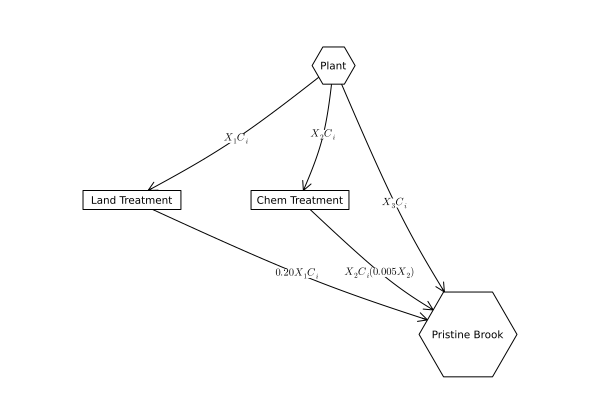

"for x_1 = 60, x_2 = 40, x_3 = 0" = "for x_1 = 60, x_2 = 40, x_3 = 0"
effluent = 20.0
cost = 240.0
"for x_1 = 70, x_2 = 28, x_3 = 2" = "for x_1 = 70, x_2 = 28, x_3 = 2"
effluent = 19.92
cost = 287.0


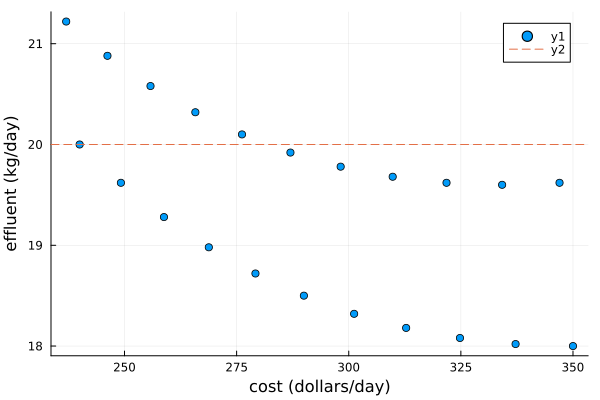

In [50]:
A = [0 1 1 1;
    0 0 0 1;
    0 0 0 1;
    0 0 0 0]

names = ["Plant", "Land Treatment", "Chem Treatment", "Pristine Brook"]
# modify this dictionary to add labels
edge_labels = Dict((1, 2) => L"X_1C_i", (1,3) => L"X_2C_i", (1, 4) => L"X_3C_i",(2, 4) => L"0.20X_1C_i",(3, 4) => L"X_2C_i(0.005X_2)")
shapes=[:hexagon, :rect, :rect, :hexagon]
xpos = [0, -1.5, -0.25, 1]
ypos = [1, 0, 0, -1]

p = graphplot(A, names=names,edgelabel=edge_labels, markersize=0.15, markershapes=shapes, markercolor=:white, x=xpos, y=ypos)
display(p)

function treatment_plan(x_1, x_2, X_total=100, C_i=1)
    #function takes in X_1 and X_2 flows, calculates and returns the effluent and treatment cost
    influent_mass = X_total * C_i
    x_3 = X_total - x_1 - x_2
    mass_removed = (x_1 * 0.80)*C_i + (x_2 - 0.005 * x_2^2)*C_i
    cost = (1/20 * x_1^2) + (1.5 * x_2)
    effluent_mass = influent_mass - mass_removed
    return (effluent_mass, cost)
    end
    
#sampling and plotting
# x_1_values = [0, 10, 20, 30, 35, 38, 40, 42, 45, 50, 60, 70, 80, 90, 97]
# x_2_values = [98, 88, 78, 68, 63, 60, 58, 56, 53, 48, 38, 28, 18, 8, 1]

#checking best values
effluent,cost = treatment_plan(60,40)
@show "for x_1 = 60, x_2 = 40, x_3 = 0";
@show effluent
@show cost

effluent,cost = treatment_plan(70,28)
@show "for x_1 = 70, x_2 = 28, x_3 = 2";
@show effluent
@show cost;

#setting x_3 = 0 or 2, choose possible values for x_1 and x_2
x_1_values = [60,60,62,62,64,64,66,66,68,68,70,70,72,72,74,74,76,76,78,78,80,80]
x_2_values = [38,40,36,38,34,36,32,34,30,32,28,30,26,28,24,26,22,24,20,22,18,20]
    
#running the function and plotting
output = treatment_plan.(x_1_values,x_2_values)
a = [out[1] for out in output]
b = [out[2] for out in output]

scatter(b,a, ylabel="effluent (kg/day)", xlabel="cost (dollars/day)")
hline!([20], linestyle=:dash)

**In this problem**:

-   Formulate a mathematical model for the treatment cost and the amount
    of YUK that will be discharged into Pristine Brook based on the
    wastewater allocations. This is best done with some equations and
    supporting text explaining the derivation. Make sure you include, as
    additional equations in the model, any needed constraints on
    relevant values. You can find some basics on writing mathematical
    equations using the LaTeX typesetting syntax
    [here](https://viveks.me/environmental-systems-analysis/tutorials/latex-notebook.qmd),
    and a cheatsheet with LaTeX commands can be found on the course
    website’s [Resources
    page](https://viveks.me/environmental-systems-analysis/resources/markdown.qmd).

-   Implement your systems model as a Julia function which computes the
    resulting YUK concentration and cost for a particular treatment
    plan. You can return multiple values from a function with a
    [tuple](https://docs.julialang.org/en/v1/manual/functions/#Tuples-1),
    as in:

    ``` {julia}
    function multiple_return_values(x, y)
        return (x+y, x*y)
    end

    a, b = multiple_return_values(2, 5)
    @show a;
    @show b;
    ```

    To evalute the function over vectors of inputs, you can *broadcast*
    the function by adding a decimal `.` before the function arguments
    and accessing the resulting values by writing a *comprehension* to
    loop over the individual outputs in the vector:

    ``` {julia}
    x = [1, 2, 3, 4, 5]
    y = [6, 7, 8, 9, 10]

    output = multiple_return_values.(x, y)
    a = [out[1] for out in output]
    b = [out[2] for out in output]
    @show a;
    @show b;
    ```

    Make sure you comment your code appropriately to make it clear what
    is going on and why.

-   Use your function to experiment with some different combinations of
    wastewater discharge and treatment and plot the results of these
    experiments. Can you find one that satisfies the YUK effluent
    standard (plot this as well as a dashed red line)? What was the
    cost? What can you say about the tradeoff between treatment cost and
    YUK concentration? You don’t have to find an “optimal” solution to
    this problem, but what do you think would be needed to find a better
    solution?

### Problem 5 (10 points)

**This problem is only required for students in BEE 5750**.

#### Problem 5.1

Using a
[comprehension](https://viveks.me/environmental-systems-analysis/tutorials/julia-basics.html#comprehensions),
count the number of odd numbers between 0 and 149.

> **Hint**
>
> `iseven()` returns `true` for even numbers and `false` for odd
> numbers.

#### Problem 5.2

Write a function `polynomial(x, a)` which calculates the polynomial
$$p(x) = \sum_{i=1}^n a_i x^i$$

based on a point `x` and a coefficient vector `a` of length `n` using a
loop. Test your function by computing $$p(x) = 2x^3 - x^2 + 1$$ at
$x=2$.

## References

List any external references consulted, including classmates.

Problem 1 and 2:["Julia Documentation Site"](https://docs.julialang.org/en/v1/base/collections/)

Problem 3: ["Julia Discourse Page"](https://discourse.julialang.org/t/round-float-with-julia-1-1/27683), ["Ed Discussion #22"](https://edstem.org/us/courses/59593/discussion/5208154), ["Julia Documentation Site"](https://docs.julialang.org/en/v1/manual/arrays/#Broadcasting)

Problem 4: https://discourse.julialang.org/t/plotting-multiple-figures-using-plots-jl/57859/6, https://www.juliasos.com/viz/plot-vertical-horizontal-lines-on-multiple-julia-graphs/#:~:text=jl%20package%20provides%20a%20high,functions%20respectively.